In [2]:
import pandas as pd
http = pd.read_csv('/content/main1.csv')

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.4 MB/s eta 0:

In [40]:
from pycaret.classification import *

# Assuming http is your pandas DataFrame containing the dataset
classification_setup = setup(data=http,
                              target='class',  # 'class' is the target variable
                              normalize=True,
                              numeric_features=['Single_q', 'Double_q', 'Dashes', 'Braces', 'Spaces', 'Bad_Words'],
                              ignore_features=['Method', 'Path', 'Body'])

# Compare classification models
compare_models()


,Description,Value
0,Session id,7188
1,Target,class
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(1206, 10)"
5,Transformed data shape,"(1206, 7)"
6,Transformed train set shape,"(844, 7)"
7,Transformed test set shape,"(362, 7)"
8,Ignore features,3
9,Numeric features,6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9384,0.9612,0.9760,0.8460,0.9048,0.8598,0.8662,0.4780
gbc,Gradient Boosting Classifier,0.9372,0.9647,0.9760,0.8436,0.9033,0.8574,0.8642,0.3060
lightgbm,Light Gradient Boosting Machine,0.9372,0.9624,0.9760,0.8436,0.9033,0.8574,0.8642,0.4130
knn,K Neighbors Classifier,0.9360,0.9561,0.9600,0.8503,0.9001,0.8534,0.8587,0.1830
dt,Decision Tree Classifier,0.9360,0.9575,0.9640,0.8473,0.9004,0.8536,0.8592,0.0860
ada,Ada Boost Classifier,0.9360,0.9624,0.9640,0.8473,0.9004,0.8536,0.8592,0.5230
et,Extra Trees Classifier,0.9360,0.9594,0.9640,0.8473,0.9004,0.8536,0.8592,0.4500
xgboost,Extreme Gradient Boosting,0.9336,0.9634,0.9640,0.8420,0.8972,0.8487,0.8547,0.2580
lr,Logistic Regression,0.9300,0.9491,0.9840,0.8215,0.8943,0.8428,0.8518,0.7550
svm,SVM - Linear Kernel,0.9289,0.0000,0.9840,0.8184,0.8925,0.8402,0.8494,0.0790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7188, verbose=0, warm_start=False)

In [41]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9647,0.9833,1.0000,0.8929,0.9434,0.9179,0.9210
1,0.9412,0.9600,1.0000,0.8333,0.9091,0.8661,0.8740
2,0.9294,0.9463,0.9600,0.8276,0.8889,0.8376,0.8425
3,0.9176,0.9492,1.0000,0.7879,0.8814,0.8196,0.8333
4,0.9286,0.9492,1.0000,0.8065,0.8929,0.8402,0.8511
5,0.9167,0.9576,1.0000,0.7812,0.8772,0.8156,0.8298
6,0.9286,0.9458,0.9200,0.8519,0.8846,0.8330,0.8343
7,0.9643,0.9756,1.0000,0.8929,0.9434,0.9174,0.9206
8,0.9286,0.9542,0.9600,0.8276,0.8889,0.8367,0.8417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

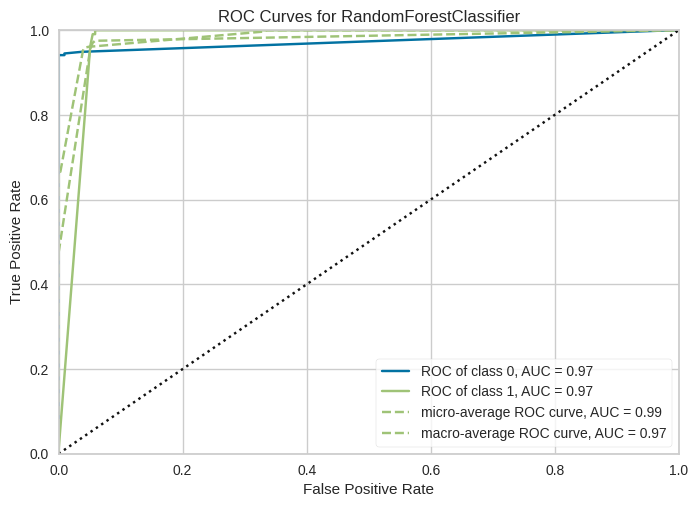

In [43]:
plot_model(rf_model)

In [44]:
test = pd.read_csv('/content/test_real.csv')
test.head()

,Method,Path,Body,Single_q,Double_q,Dashes,Braces,Spaces,Bad_Words
0,GET,/DVWA/,NaN,0,0,0,0,0,0
1,GET,/DVWA,NaN,0,0,0,0,0,0
2,GET,/DVWA,NaN,0,0,0,0,0,0
3,GET,/DVWA/,NaN,0,0,0,0,0,0
4,GET,/DVWA/dvwa/js/dvwaPage.js,NaN,0,0,0,0,0,0


In [45]:
test_result = predict_model(rf_model,data = test)


In [46]:
test_result

,Method,Path,Body,Single_q,Double_q,Dashes,Braces,Spaces,Bad_Words,prediction_label,prediction_score
0,GET,/DVWA/,NaN,0,0,0,0,0,0,good,0.8505
1,GET,/DVWA,NaN,0,0,0,0,0,0,good,0.8505
2,GET,/DVWA,NaN,0,0,0,0,0,0,good,0.8505
3,GET,/DVWA/,NaN,0,0,0,0,0,0,good,0.8505
4,GET,/DVWA/dvwa/js/dvwaPage.js,NaN,0,0,0,0,0,0,good,0.8505
...,...,...,...,...,...,...,...,...,...,...,...
60,GET,/DVWA/vulnerabilities/authbypass/,NaN,0,0,0,0,0,0,good,0.8505
61,GET,/DVWA/vulnerabilities/authbypass/get_user_data...,NaN,0,0,0,0,0,0,good,0.8505
62,GET,/DVWA/vulnerabilities/sqli/,NaN,0,0,0,0,0,0,good,0.8505
63,GET,/DVWA/vulnerabilities/sqli/?id=5&Submit=Submit,NaN,0,0,0,0,0,0,good,0.8505


In [47]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
model1 = finalize_model(rf_model)

In [49]:
save_model(model1,'model1_grindwall')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Single_q', 'Double_q', 'Dashes',
                                              'Braces', 'Spaces', 'Bad_Words'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_